# Computer Vision Homework 03 - Compression with Autoencoders or Implicit Neural Representations

Contact: David C. Schedl (david.schedl@fh-hagenberg.at)

Note: this is the starter pack for the **Computer Vision** homework. You do not need to use this template!
Which framework you use is up to you!

For this exercise the task is to compress images (again). In comparison to HW01 do it with deep learning, now.
You can choose between two options/approaches: Autoencoders or Implicit Neural Representations. Note, it is also possible to combine both approaches.

Analyze your algorithm on a set of images and evaluate your results concerning quality (e.g., MSE) and size reduction achieved (how many bits could be saved?). What are there available parameters and how can you tune them?

Ideally you use set of different evaluation images (e.g., showing artificial content, buildings, nature, animals, objects, colors, …). For the AutoEncoers make sure that the same images are not in your training set.

*Hint:* Work with low-res images and small networks to speed up computation and avoid huge storage requirements.


**Further comments/hints:**

*   You do not need to come up with a super network architecture! It is mostly about getting into the topic.
*   It is up to you if you want to use a CNN or a classical NN with MLPs (dense layers) for the Autoencoder.
*   Think about the problem, solve it, and critically evaluate your solution.
*   For this exercise, it makes sense to compare it to your results of HW01.
*   Summarize your ideas and findings in the report.



**Have fun!** 😸

# Option 1: Autoencoders (with TensorFlow)

An autoencoder is a neural network that learns efficient codings of unlabeled data (so it uses unsupervised learning). If the encoding is much smaller than the initial data you can think of the algorithm as compression.
That's what we want to do in this task!

Implement an autoencoder that compresses images. The dataset that you train it with and the resolution is up to you.
Evaluate how small the encoding can get before the image quality gets pretty bad?




## Initialization

As always let's import useful libraries, first.
This notebook works with TensorFlow and is designed to run in a Colab Environment.
Getting everything running locally might take some time.



In [2]:
%%capture
# use %% capture suppress any output

# make sure to use tensorflow 2.x
%tensorflow_version 2.x

# load the TensorBoard notebook extension to display training results later
%load_ext tensorboard

import numpy as np
import matplotlib.pyplot as plt
import datetime
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
import tensorflow.keras.losses as losses
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.layers import (Dense, Flatten, Conv2D, MaxPooling2D,
                                     Conv2DTranspose, Reshape, Input)

from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical

from __future__ import absolute_import, division, print_function, unicode_literals

def MSE(A,B):
  """compute the mean squared error (MSE) between numpy array A and B
  """
  return ((A - B)**2).mean(axis=None)


## Example Dataset: CIFAR 10

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. It was originally used for Machine Learning, but we can use it for our compression experiments.
For details, see [this website](https://www.cs.toronto.edu/~kriz/cifar.html)!

The dataset is readily available as TensorFlow/Keras dataset.
In HW01 we used a different way to load the data (without TensorFlow).

**Note: you do not need to use CIFAR-10! Any other dataset is fine.**

In [3]:
(x_train, _), (x_test, _) = datasets.cifar10.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


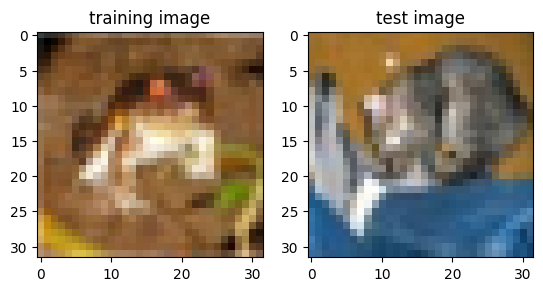

In [4]:
# display one training and one test image

train_image = x_train[0]
test_image = x_test[0]

plt.subplot(1,2,1), plt.imshow(train_image), plt.title('training image')
plt.subplot(1,2,2), plt.imshow(test_image), plt.title('test image')
plt.show()


## Example AutoEncoder with Multi-Layer Perceptrons (Dense layers)

An implementation of an MLP autoencoder which encodes images to a latent vector.
For further details see this [Tensorflow Tutorial](https://www.tensorflow.org/tutorials/generative/autoencoder).


In [20]:
class Autoencoder(Model):
  def __init__(self, latent_dim, image_shape):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim
    self.encoder = tf.keras.Sequential([
      Flatten(),
      Dense(latent_dim, activation='sigmoid'),
    ])
    self.encoder = tf.keras.Sequential([
            Flatten(),
            Dense(64, activation='sigmoid'),
            Dense(latent_dim, activation='sigmoid'),
        ])
    self.decoder = tf.keras.Sequential([
        Dense(64, activation='sigmoid'),
      Dense(np.prod(image_shape), activation='sigmoid'),
      Reshape(image_shape)
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

latent_dim = 64
image_shape = x_train[0].shape
autoencoder = Autoencoder(latent_dim, image_shape)
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

autoencoder.build(x_test.shape)
autoencoder.summary()

Model: "autoencoder_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_14 (Sequential)  (10000, 64)               200832    
                                                                 
 sequential_15 (Sequential)  (10000, 32, 32, 3)        203840    
                                                                 
Total params: 404,672
Trainable params: 404,672
Non-trainable params: 0
_________________________________________________________________


In [6]:
# Training Preparation (if you want to use TensorBoard)

# Place the logs in a timestamped subdirectory
# This allows to easy select different training runs
# In order not to overwrite some data, it is useful to have a name with a timestamp
log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
# Specify the callback object
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# tf.keras.callback.TensorBoard ensures that logs are created and stored
# We need to pass callback object to the fit method
# The way to do this is by passing the list of callback objects, which is in our case just one

In [ ]:
%tensorboard --logdir logs/fit
# open the TensorBoard here!

### Training

In [21]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[tensorboard_callback],
                verbose=True)

Epoch 1/10
1563/1563 [==============================] - 9s 5ms/step - loss: 0.0447 - val_loss: 0.0382
Epoch 2/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.0336 - val_loss: 0.0317
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0314 - val_loss: 0.0320
Epoch 4/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.0303 - val_loss: 0.0292
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0286 - val_loss: 0.0303
Epoch 6/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.0269 - val_loss: 0.0259
Epoch 7/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.0258 - val_loss: 0.0262
Epoch 8/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0254 - val_loss: 0.0256
Epoch 9/10
1563/1563 [==============================] - 9s 5ms/step - loss: 0.0246 - val_loss: 0.0244
Epoch 10/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.024

### Encoding / Decoding

In [9]:
import random

encoded_imgs = autoencoder.encoder(x_test).numpy()
print(encoded_imgs.shape) # every encoded image is represented by 64 values
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

random_indices = random.sample(range(len(x_test)), 3)

for i in random_indices:
    # Original image size
    original_size = len(x_test[i].tobytes())
    print(f"Original Image Size (Index {i}): {original_size} bytes")

    # Encoded image size
    encoded_img = autoencoder.encoder(np.expand_dims(x_test[i], axis=0)).numpy()
    encoded_str = encoded_img.tobytes()
    compressed_size = len(encoded_str)
    print(f"Compressed Image Size (Index {i}): {compressed_size} bytes")

    # Decoded image size
    decoded_img = autoencoder.decoder(encoded_img).numpy()
    decoded_size = len(decoded_img.tobytes())
    print(f"Decoded Image Size (Index {i}): {decoded_size} bytes")


(10000, 512)
Original Image Size (Index 2795): 12288 bytes
Compressed Image Size (Index 2795): 2048 bytes
Decoded Image Size (Index 2795): 12288 bytes
Original Image Size (Index 9280): 12288 bytes
Compressed Image Size (Index 9280): 2048 bytes
Decoded Image Size (Index 9280): 12288 bytes
Original Image Size (Index 8980): 12288 bytes
Compressed Image Size (Index 8980): 2048 bytes
Decoded Image Size (Index 8980): 12288 bytes


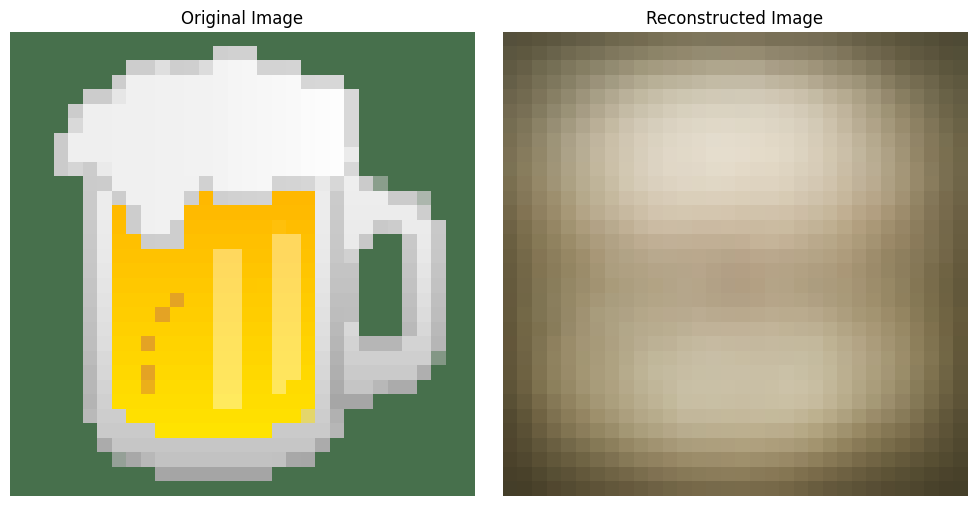

Encoded Image Weight: 256 bytes
Decoded Image Weight: 12288 bytes


In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('beer.png')

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
resized_image = cv2.resize(image, (32, 32))
resized_image = resized_image.astype('float32') / 255.0
resized_image = np.expand_dims(resized_image, axis=0)
encoded_img = autoencoder.encoder(resized_image).numpy()
decoded_img = autoencoder.decoder(encoded_img).numpy()

# Display the original and reconstructed images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(resized_image.squeeze())
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(decoded_img.squeeze())
plt.title('Reconstructed Image')
plt.axis('off')

plt.tight_layout()
plt.show()
print(f"Encoded Image Weight: {encoded_img.nbytes} bytes")
print(f"Decoded Image Weight: {decoded_img.nbytes} bytes")



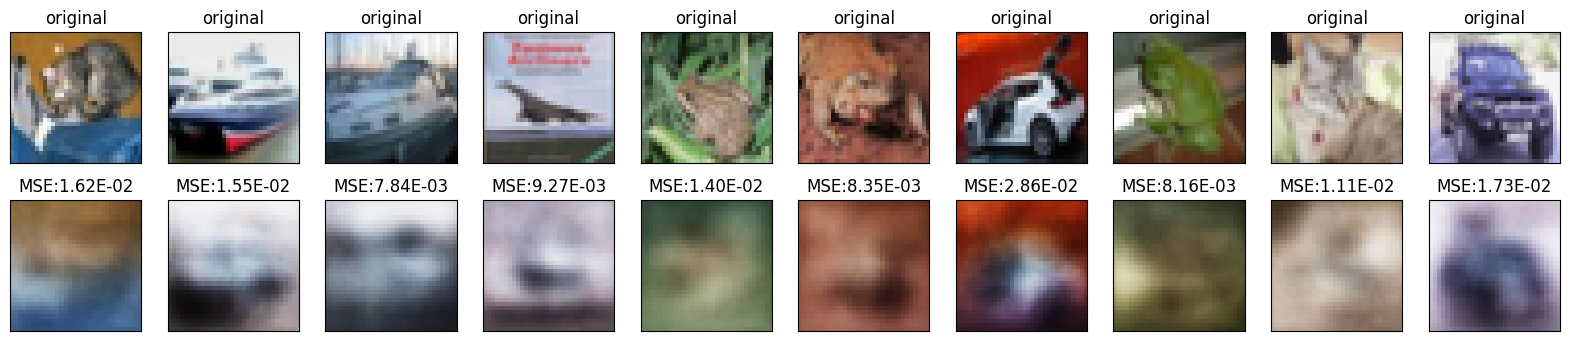

In [11]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  mse = MSE(x_test[i], decoded_imgs[i])

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title(f"MSE:{mse:.2E}")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()


## Example AEs with Convolutional Layers

Below you will find two variants of autoencoders that use convolutions to downsample and transposed convolutions to upsample.

The second variant uses dense layers to further downsample. Note that dense layers result in a huge number of parameters!

In [12]:
# a convolutional auto encoder with convolutional and transposed convolutional layers
class ConvAutoencoderV1(Model):
  def __init__(self, latent_dim, image_shape):
    super(ConvAutoencoderV1, self).__init__()
    self.encoder = tf.keras.Sequential([
      Input(shape=image_shape),
      Conv2D(16, (3, 3), activation='relu', padding='same', strides=2), # downsample x2
      Conv2D(8, (3, 3), activation='relu', padding='same', strides=2),  # downsample x2
      Conv2D(4, (3, 3), activation='relu', padding='same', strides=2),  # downsample x2
      # 4x4x4 = 64
    ])

    latent_img_shape = (8,int(image_shape[0]/4),int(image_shape[1]/4))

    self.decoder = tf.keras.Sequential([
      Conv2DTranspose(4, kernel_size=3, strides=2, activation='relu', padding='same'),
      Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
      Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
      Conv2D(image_shape[2], kernel_size=(3, 3), activation='sigmoid', padding='same') # back to color
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

latent_dim = 64
image_shape = x_train[0].shape
autoencoder = ConvAutoencoderV1(latent_dim, image_shape)
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

autoencoder.build(x_test.shape)
autoencoder.summary()

Model: "conv_autoencoder_v1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (None, 4, 4, 4)           1900      
                                                                 
 sequential_4 (Sequential)   (10000, 32, 32, 3)        2047      
                                                                 
Total params: 3,947
Trainable params: 3,947
Non-trainable params: 0
_________________________________________________________________


In [13]:
# a convolutional auto encoder with additional dense layers
# Note that this has a lot more parameters!

class ConvAutoencoderV2(Model):
  def __init__(self, latent_dim, image_shape):
    super(ConvAutoencoderV2, self).__init__()
    self.encoder = tf.keras.Sequential([
      Input(shape=image_shape),
      Conv2D(16, (3, 3), activation='relu', padding='same', strides=2), # downsample x2
      Conv2D(8, (3, 3), activation='relu', padding='same', strides=2),  # downsample x2
      Flatten(), # 8x8x8 = 512
      Dense(latent_dim, activation='relu')
    ])

    latent_img_shape = (8,int(image_shape[0]/4),int(image_shape[1]/4))

    self.decoder = tf.keras.Sequential([
      Input(shape=(latent_dim,)),
      Dense(np.prod(latent_img_shape)),
      Reshape(latent_img_shape),
      Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
      Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
      Conv2D(image_shape[2], kernel_size=(3, 3), activation='sigmoid', padding='same') # back to color
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

latent_dim = 64
image_shape = x_train[0].shape
autoencoder = ConvAutoencoderV2(latent_dim, image_shape)
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

autoencoder.build(x_test.shape)
autoencoder.summary()

Model: "conv_autoencoder_v2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_5 (Sequential)   (None, 64)                34440     
                                                                 
 sequential_6 (Sequential)   (None, 32, 32, 3)         35467     
                                                                 
Total params: 69,907
Trainable params: 69,907
Non-trainable params: 0
_________________________________________________________________


# Option 2: Implicit Neural Representations

Implicit Neural Representations are a new way to represent images. This approach is very different from the classical CNNs that we have seen so far.
The idea is to learn a function that maps a coordinate to a color value. These representations are very powerful for 3D scene representations, but can also be used for 2D images.

For a starter code see our [Implicit Neural Representations with PyTorch Tutorial](https://colab.research.google.com/github/Digital-Media/vco/blob/main/11_IMLP.ipynb).

Note that it is okay to only use a limited set of images.
Explore the network size, the number of training epochs, and the positional encoding to get a feeling for the algorithm.